# Target resolutions

Variable resolution is fixed at 2.2km-coarsened-27x for vorticity and pr (not for guide grids as these are the grids used to regrid the data)

In [26]:
%reload_ext autoreload

%autoreload 2

import os

import iris
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray as xr

from ml_downscaling_emulator import UKCPDatasetMetadata
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree

moose_dir = os.path.join(os.getenv("DERIVED_DATA"), "moose")

## Guide grids

In [3]:
grid22 = xr.open_dataset('../../src/ml_downscaling_emulator/utils/target-grids/2.2km/uk/moose_pr_grid.nc')
grid22

<xarray.Dataset>
Dimensions:                     (time: 2, bnds: 2, grid_latitude: 654,
                                 grid_longitude: 532)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 1980-12-02 ...
  * grid_latitude               (grid_latitude) float32 -5.547 -5.511 ... 8.927
  * grid_longitude              (grid_longitude) float32 353.1 353.1 ... 365.2
    forecast_period             (time) timedelta64[ns] ...
    forecast_reference_time     object ...
    realization                 int32 ...
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 ...
    pr                          (time, grid_latitude, grid_longitude) float32 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [4]:
grid44 = xr.open_dataset('../../src/ml_downscaling_emulator/utils/target-grids/2.2km-coarsened-2x/uk/moose_pr_grid.nc')
grid44

<xarray.Dataset>
Dimensions:                     (time: 2, bnds: 2, grid_latitude: 327,
                                 grid_longitude: 266)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 1980-12-02 ...
  * grid_latitude               (grid_latitude) float32 -5.529 -5.457 ... 8.909
  * grid_longitude              (grid_longitude) float32 353.1 353.2 ... 365.2
    forecast_period             (time) timedelta64[ns] ...
    forecast_reference_time     object ...
    realization                 int32 ...
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 ...
    uk-pr                       (time, grid_latitude, grid_longitude) float32 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [5]:
grid88 = xr.open_dataset('../../src/ml_downscaling_emulator/utils/target-grids/2.2km-coarsened-4x/uk/moose_pr_grid.nc')
grid88

<xarray.Dataset>
Dimensions:                     (time: 2, bnds: 2, grid_latitude: 163,
                                 grid_longitude: 133)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 1980-12-02 ...
  * grid_latitude               (grid_latitude) float32 -5.493 -5.349 ... 8.801
  * grid_longitude              (grid_longitude) float32 353.1 353.3 ... 365.1
    forecast_period             (time) timedelta64[ns] ...
    forecast_reference_time     object ...
    realization                 int32 ...
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 ...
    uk-pr                       (time, grid_latitude, grid_longitude) float32 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [6]:
grid176 = xr.open_dataset('../../src/ml_downscaling_emulator/utils/target-grids/2.2km-coarsened-8x/uk/moose_pr_grid.nc')
grid176

<xarray.Dataset>
Dimensions:                     (time: 2, bnds: 2, grid_latitude: 81,
                                 grid_longitude: 66)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 1980-12-02 ...
  * grid_latitude               (grid_latitude) float32 -5.421 -5.133 ... 8.585
  * grid_longitude              (grid_longitude) float32 353.2 353.5 ... 364.9
    forecast_period             (time) timedelta64[ns] ...
    forecast_reference_time     object ...
    realization                 int32 ...
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 ...
    uk-pr                       (time, grid_latitude, grid_longitude) float32 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [8]:
grid594 = xr.open_dataset('../../src/ml_downscaling_emulator/utils/target-grids/2.2km-coarsened-27x/uk/moose_pr_grid.nc')
grid594

<xarray.Dataset>
Dimensions:                     (time: 2, bnds: 2, grid_latitude: 24,
                                 grid_longitude: 19)
Coordinates:
  * time                        (time) object 1980-12-01 12:00:00 1980-12-02 ...
  * grid_latitude               (grid_latitude) float32 -5.079 -4.139 ... 8.243
  * grid_longitude              (grid_longitude) float32 353.5 354.5 ... 364.0
    forecast_period             (time) timedelta64[ns] ...
    forecast_reference_time     object ...
    realization                 int32 ...
Dimensions without coordinates: bnds
Data variables:
    rotated_latitude_longitude  int32 ...
    time_bnds                   (time, bnds) object ...
    grid_latitude_bnds          (grid_latitude, bnds) float32 ...
    grid_longitude_bnds         (grid_longitude, bnds) float32 ...
    forecast_period_bnds        (time, bnds) float64 ...
    uk-pr                       (time, grid_latitude, grid_longitude) float32 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

## 2.2km target resolution

In [27]:
vort22_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-27x", variable="vorticity850")

vort_ds22 = xr.open_mfdataset(vort22_meta.existing_filepaths())
vort_ds22

<xarray.Dataset>
Dimensions:                  (time: 1080, grid_latitude: 64,
                              grid_longitude: 64, bnds: 2)
Coordinates:
    pressure                 float32 850.0
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  (time) object 1979-09-01 00:00:00 ... 2059-09-01...
    realization              int32 1100000
  * time                     (time) object 1980-12-01 12:00:00 ... 2061-11-30...
  * grid_latitude            (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude           (grid_longitude) float32 360.9 360.9 ... 362.1
Dimensions without coordinates: bnds
Data variables:
    vorticity850             (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    grid_latitude_bnds       (time, grid_latitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    grid_longitude_bnds      (time, grid_longitude, bnds) float32 dask.array<chunksize=(360, 64, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [41]:
pr22_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-27x-2.2km", variable="pr")

pr_ds22 = xr.open_mfdataset(pr22_meta.existing_filepaths())
pr_ds22

<xarray.Dataset>
Dimensions:                  (time: 360, grid_latitude: 64, grid_longitude: 64,
                              bnds: 2)
Coordinates:
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  object ...
    realization              int32 ...
  * time                     (time) object 1980-12-01 12:00:00 ... 1981-11-30...
  * grid_latitude            (grid_latitude) float32 -1.58 -1.56 ... -0.32
  * grid_longitude           (grid_longitude) float32 360.9 360.9 ... 362.1
Dimensions without coordinates: bnds
Data variables:
    pr                       (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(360, 64, 64), meta=np.ndarray>
    grid_latitude_bnds       (grid_latitude, bnds) float32 dask.array<chunksize=(64, 2), meta=np.ndarray>
    grid_longitude_bnds      (grid_longitude, bnds) float32 dask.array<chunksize=(64, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

## 2.2km-coarsened-2x target resolution

In [35]:
vort44_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-27x-2.2km-coarsened-2x", variable="vorticity850")

vort_ds44 = xr.open_mfdataset(vort44_meta.existing_filepaths())
vort_ds44

<xarray.Dataset>
Dimensions:                  (time: 360, grid_latitude: 32, grid_longitude: 32,
                              bnds: 2)
Coordinates:
    pressure                 float32 ...
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  object ...
    realization              int32 ...
  * time                     (time) object 1980-12-01 12:00:00 ... 1981-11-30...
  * grid_latitude            (grid_latitude) float32 -1.55 -1.51 ... -0.3099
  * grid_longitude           (grid_longitude) float32 360.9 360.9 ... 362.1
Dimensions without coordinates: bnds
Data variables:
    vorticity850             (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 32, 32), meta=np.ndarray>
    grid_latitude_bnds       (grid_latitude, bnds) float32 dask.array<chunksize=(32, 2), meta=np.ndarray>
    grid_longitude_bnds      (grid_longitude, bnds) float32 dask.array<chunksize=(32, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [36]:
pr44_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-27x-2.2km-coarsened-2x", variable="pr")

pr_ds44 = xr.open_mfdataset(pr44_meta.existing_filepaths())
pr_ds44

<xarray.Dataset>
Dimensions:                  (time: 360, grid_latitude: 32, grid_longitude: 32,
                              bnds: 2)
Coordinates:
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  object ...
    realization              int32 ...
  * time                     (time) object 1980-12-01 12:00:00 ... 1981-11-30...
  * grid_latitude            (grid_latitude) float32 -1.55 -1.51 ... -0.3099
  * grid_longitude           (grid_longitude) float32 360.9 360.9 ... 362.1
Dimensions without coordinates: bnds
Data variables:
    pr                       (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(360, 32, 32), meta=np.ndarray>
    grid_latitude_bnds       (grid_latitude, bnds) float32 dask.array<chunksize=(32, 2), meta=np.ndarray>
    grid_longitude_bnds      (grid_longitude, bnds) float32 dask.array<chunksize=(32, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

## 2.2km-coarsened-4x target resolution

In [29]:
vort88_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-27x-2.2km-coarsened-4x", variable="vorticity850")

vort_ds88 = xr.open_mfdataset(vort88_meta.existing_filepaths())
vort_ds88

<xarray.Dataset>
Dimensions:                  (time: 360, grid_latitude: 32, grid_longitude: 32,
                              bnds: 2)
Coordinates:
    pressure                 float32 ...
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  object ...
    realization              int32 ...
  * time                     (time) object 1980-12-01 12:00:00 ... 1981-11-30...
  * grid_latitude            (grid_latitude) float32 -2.17 -2.09 ... 0.23 0.3101
  * grid_longitude           (grid_longitude) float32 360.3 360.4 ... 362.8
Dimensions without coordinates: bnds
Data variables:
    vorticity850             (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 32, 32), meta=np.ndarray>
    grid_latitude_bnds       (grid_latitude, bnds) float32 dask.array<chunksize=(32, 2), meta=np.ndarray>
    grid_longitude_bnds      (grid_longitude, bnds) float32 dask.array<chunksize=(32, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

In [30]:
pr88_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-27x-2.2km-coarsened-4x", variable="pr")

pr_ds88 = xr.open_mfdataset(pr88_meta.existing_filepaths())
pr_ds88

<xarray.Dataset>
Dimensions:                  (time: 360, grid_latitude: 32, grid_longitude: 32,
                              bnds: 2)
Coordinates:
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  object ...
    realization              int32 ...
  * time                     (time) object 1980-12-01 12:00:00 ... 1981-11-30...
  * grid_latitude            (grid_latitude) float32 -2.17 -2.09 ... 0.23 0.3101
  * grid_longitude           (grid_longitude) float32 360.3 360.4 ... 362.8
Dimensions without coordinates: bnds
Data variables:
    pr                       (time, grid_latitude, grid_longitude) float32 dask.array<chunksize=(360, 32, 32), meta=np.ndarray>
    grid_latitude_bnds       (grid_latitude, bnds) float32 dask.array<chunksize=(32, 2), meta=np.ndarray>
    grid_longitude_bnds      (grid_longitude, bnds) float32 dask.array<chunksize=(32, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

## 2.2km-coarsened-8x target resolution

In [33]:
vort176_meta = UKCPDatasetMetadata(moose_dir, frequency="day", domain="london", resolution="2.2km-coarsened-27x-2.2km-coarsened-8x", variable="vorticity850")

vort_ds176 = xr.open_mfdataset(vort176_meta.existing_filepaths())
vort_ds176

<xarray.Dataset>
Dimensions:                  (time: 360, grid_latitude: 16, grid_longitude: 16,
                              bnds: 2)
Coordinates:
    pressure                 float32 ...
    forecast_period          (time) timedelta64[ns] dask.array<chunksize=(360,), meta=np.ndarray>
    forecast_reference_time  object ...
    realization              int32 ...
  * time                     (time) object 1980-12-01 12:00:00 ... 1981-11-30...
  * grid_latitude            (grid_latitude) float32 -2.05 -1.89 ... 0.3501
  * grid_longitude           (grid_longitude) float32 360.4 360.6 ... 362.8
Dimensions without coordinates: bnds
Data variables:
    vorticity850             (time, grid_latitude, grid_longitude) float64 dask.array<chunksize=(360, 16, 16), meta=np.ndarray>
    grid_latitude_bnds       (grid_latitude, bnds) float32 dask.array<chunksize=(16, 2), meta=np.ndarray>
    grid_longitude_bnds      (grid_longitude, bnds) float32 dask.array<chunksize=(16, 2), meta=np.ndarray>
    time_bnds                (time, bnds) object dask.array<chunksize=(360, 2), meta=np.ndarray>
    forecast_period_bnds     (time, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   10.6
    Conventions:  CF-1.7

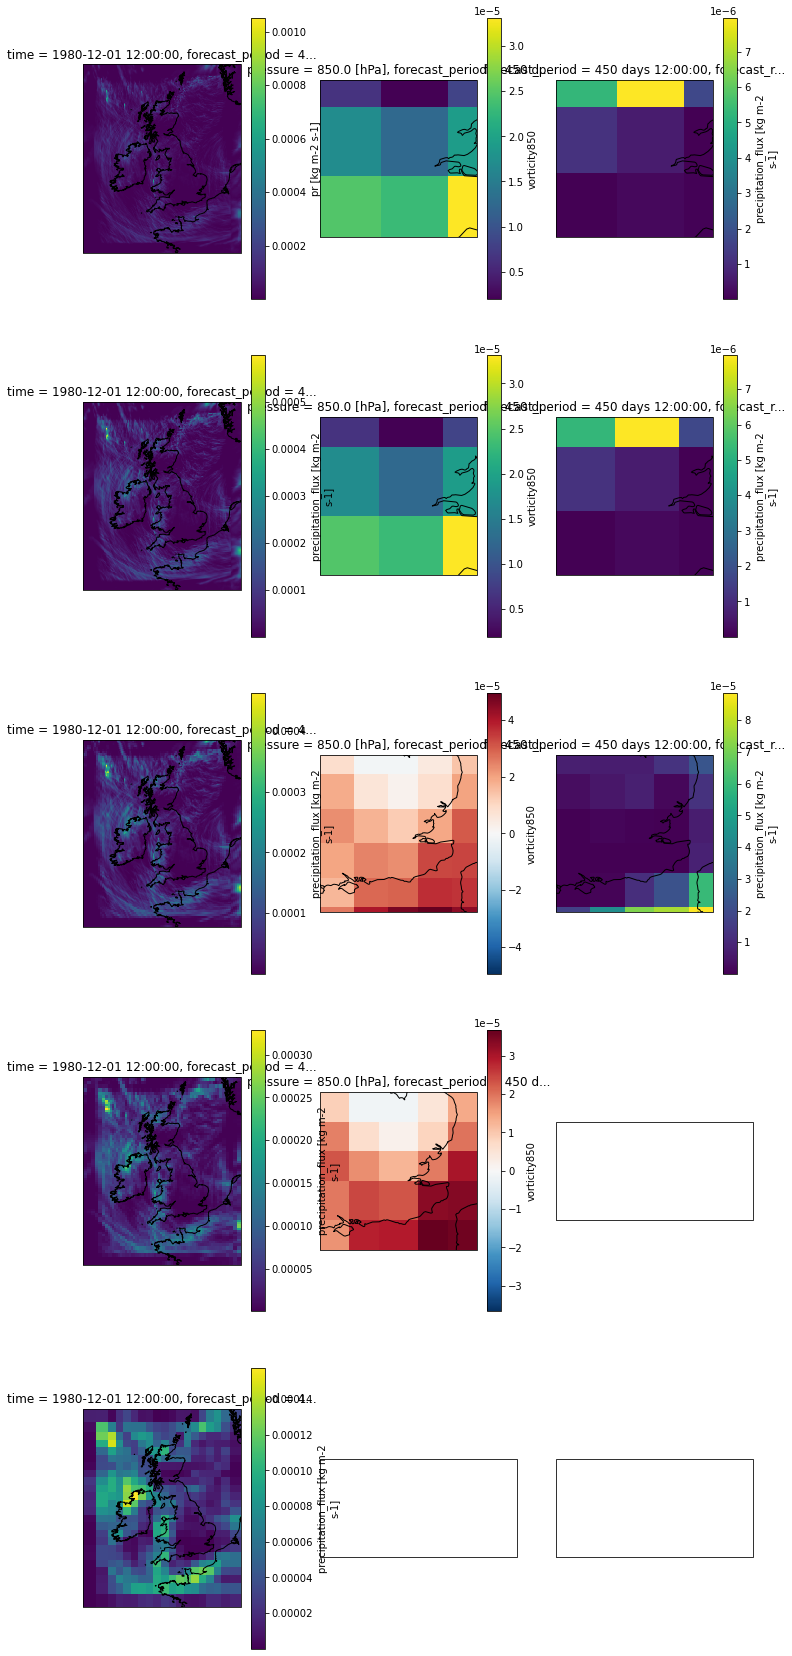

In [43]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 30), subplot_kw=dict(projection=cp_model_rotated_pole))

ts = np.random.choice(grid594.time.values)

# 1x
ax=axes[0][0]
grid22.sel(time=ts)['pr'].plot(ax=ax)
ax.coastlines()

ax=axes[0][1]
vort_ds22.sel(time=ts)['vorticity850'].plot(ax=ax)
ax.coastlines()

ax=axes[0][2]
pr_ds22.sel(time=ts)['pr'].plot(ax=ax)
ax.coastlines()

# 2x

ax=axes[1][0]
grid44.sel(time=ts)['uk-pr'].plot(ax=ax)
ax.coastlines()

ax=axes[1][1]
vort_ds44.sel(time=ts)['vorticity850'].plot(ax=ax)
ax.coastlines()

ax=axes[1][2]
pr_ds44.sel(time=ts)['pr'].plot(ax=ax)
ax.coastlines()

# 4x

ax=axes[2][0]
grid88.sel(time=ts)['uk-pr'].plot(ax=ax)
ax.coastlines()

ax=axes[2][1]
vort_ds88.sel(time=ts)['vorticity850'].plot(ax=ax)
ax.coastlines()

ax=axes[2][2]
pr_ds88.sel(time=ts)['pr'].plot(ax=ax)
ax.coastlines()

# 8x

ax=axes[3][0]
grid176.sel(time=ts)['uk-pr'].plot(ax=ax)
ax.coastlines()

ax=axes[3][1]
vort_ds176.sel(time=ts)['vorticity850'].plot(ax=ax)
ax.coastlines()

# 27x

ax=axes[4][0]
grid594.sel(time=ts)['uk-pr'].plot(ax=ax)
ax.coastlines()
    
